# Life log

Date: March 29, 2019

```
activities:  [ period | period | .... ]
     
```

In [24]:
import serial
from matplotlib import pyplot as plt
import numpy as np
import time
import collections

%run ../oscilloscope/script/dataset.py
%matplotlib inline

DATASET_FOLDER = '../dataset/data_my_home'
PORT = 'COM15'
BAUDRATE = 460800
TIME = 60.0 * 5
NUM_SECTION = 20

In [25]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False)['mfsc']
num_classes = len(ds.class_labels)
ds.class_labels, num_classes

(['chat',
  'reading',
  'watching_tv',
  'cocking',
  'hamster',
  'silence',
  'vacuum_cleaner',
  'shower',
  'washing_machine',
  'doing_the_dishes',
  'walking',
  'piano',
  'stairs',
  'snack'],
 14)

In [26]:
WEIGHT = [1, 17, 1, 4, 1, 1, 1, 1, 1, 1, 6, 4, 4, 8]

In [27]:
lines = []
activities = []
with  serial.Serial(PORT, BAUDRATE) as ser:
    start_time = time.time()
    while True:
        class_ = ser.readline().decode('ascii')
        class_ = int(class_)
        activities.append(class_)
        if (time.time() - start_time) > TIME:
            break

In [28]:
num_records = int(len(activities) / NUM_SECTION)
activities_reshaped = np.array(activities[:num_records * NUM_SECTION], dtype=int).reshape(num_records, NUM_SECTION)
time_recorded = TIME * (num_records * NUM_SECTION / len(activities))
tick = np.linspace(0, time_recorded, len(activities_reshaped)+1)[1:]
time_recorded, activities_reshaped, tick

(291.6666666666667,
 array([[ 0, 11, 10,  1,  3,  0,  0,  0,  3,  9,  9, 10, 10,  0,  0,  0,
          0, 10,  2,  2],
        [ 2,  9,  2,  7, 10,  2,  1, 10,  7, 12, 10, 10,  2,  0,  0,  9,
          0,  0,  0,  0],
        [ 3,  9,  9,  2,  2,  0,  3,  0,  2,  0,  8,  2,  0,  0,  9,  0,
          0,  9,  0,  0],
        [ 0,  0,  2,  9,  3,  9, 11,  0,  0,  0,  9,  0,  0,  0,  0,  0,
          9,  0,  0,  0],
        [ 9,  4,  7,  2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  9,  0,  0,
          0,  0,  0,  9],
        [ 0,  0,  0, 11,  0,  2,  0,  0,  9,  0,  0,  0,  9,  0,  0,  0,
          9,  0,  2,  0],
        [ 2,  2,  0,  0,  2,  9,  0,  2,  2,  9,  3,  0,  0,  0,  9,  9,
          2, 13, 13,  0],
        [ 0,  9,  2,  3,  2,  2,  2,  0,  0,  0,  4,  2,  2,  2, 13, 13,
          9,  3,  3, 10],
        [ 4, 13, 10, 12,  9,  4,  0,  0,  4,  0,  0,  9, 12,  2,  0,  0,
          2,  9,  9,  9],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  7,  7,  4,  8,  0,  3,  2,
          9, 13,

In [29]:
life_log = []
for a_reshaped in activities_reshaped:
    stats_section = np.zeros(num_classes)
    for a in a_reshaped:
        stats_section[a] += 1 * WEIGHT[a]
    life_log.append(np.argmax(stats_section))
life_log

[10, 10, 0, 0, 0, 0, 13, 13, 12, 9, 13, 1, 1, 1]

In [30]:
stats = np.zeros(num_classes)

n = 0
for a in activities:
    stats[a] += 1
    n += 1
stats

array([91.,  8., 41., 27., 12.,  7.,  0.,  6.,  2., 51., 15., 10.,  7.,
       11.])

Text(0.5,1,'Activities in my home')

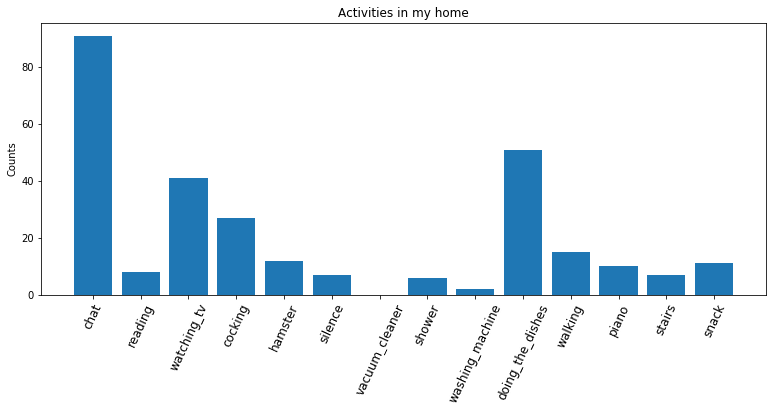

In [31]:
plt.figure(figsize=(13,5))
index = np.arange(num_classes)
plt.xticks(index, ds.class_labels, fontsize=12, rotation=65)
plt.bar(index, stats)
plt.ylabel('Counts')
plt.title('Activities in my home')
#ax = plt.gca()
#ax.yaxis.set_major_locator(plt.MultipleLocator(1))

Text(0.5,1,'Activities in my home')

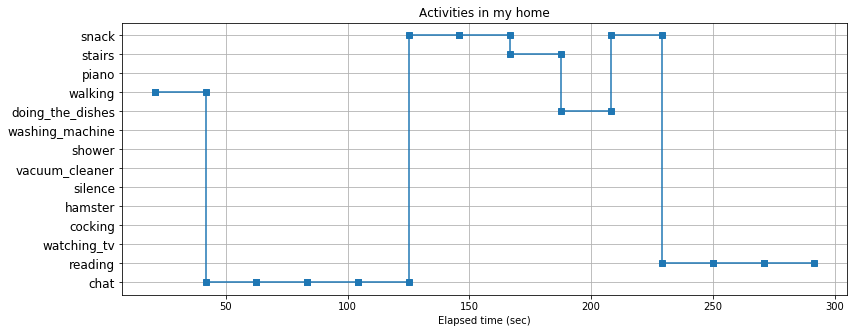

In [34]:
plt.figure(figsize=(13,5))
plt.step(tick, life_log, where='pre', marker='s')
plt.yticks(index, ds.class_labels, fontsize=12)
plt.xlabel('Elapsed time (sec)')
plt.grid()
plt.title('Activities in my home')